In [21]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from skimage.feature import hog
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA, NMF
from tqdm import tqdm

In [2]:
def images_array(jpeg_files, width=224, height=224):
    arrays = []
    for jpeg_file in tqdm(jpeg_files):
        image = Image.open(jpeg_file).resize((width, height))
        arrays.append(np.array(image).flatten())
    return np.array(arrays)

In [3]:
%%time
train = pd.read_csv(os.path.join('dataset_atmaCup11', 'train.csv'))
test = pd.read_csv(os.path.join('dataset_atmaCup11', 'test.csv'))

Wall time: 15 ms


In [4]:
train_jpeg_files = [os.path.join('dataset_atmaCup11', 'images', f'{object_id}.jpg') for object_id in train['object_id']]
train_images = images_array(train_jpeg_files)

100%|█████████████████████████████████████████████████████████████████████████████| 3937/3937 [00:05<00:00, 737.00it/s]


In [5]:
train_images = train_images / 255

In [6]:
%%time
decomposer1 = PCA(n_components=8, random_state=1).fit(train_images.copy())
train_images_decomposed1 = decomposer1.transform(train_images.copy())

Wall time: 42.2 s


In [7]:
train_images_decomposed1 = pd.DataFrame(data=train_images_decomposed1,
                                        columns=[f'comp{i + 1}' for i in range(train_images_decomposed1.shape[1])])
train_images_decomposed1['target'] = train['target']

<Figure size 1512x1512 with 0 Axes>

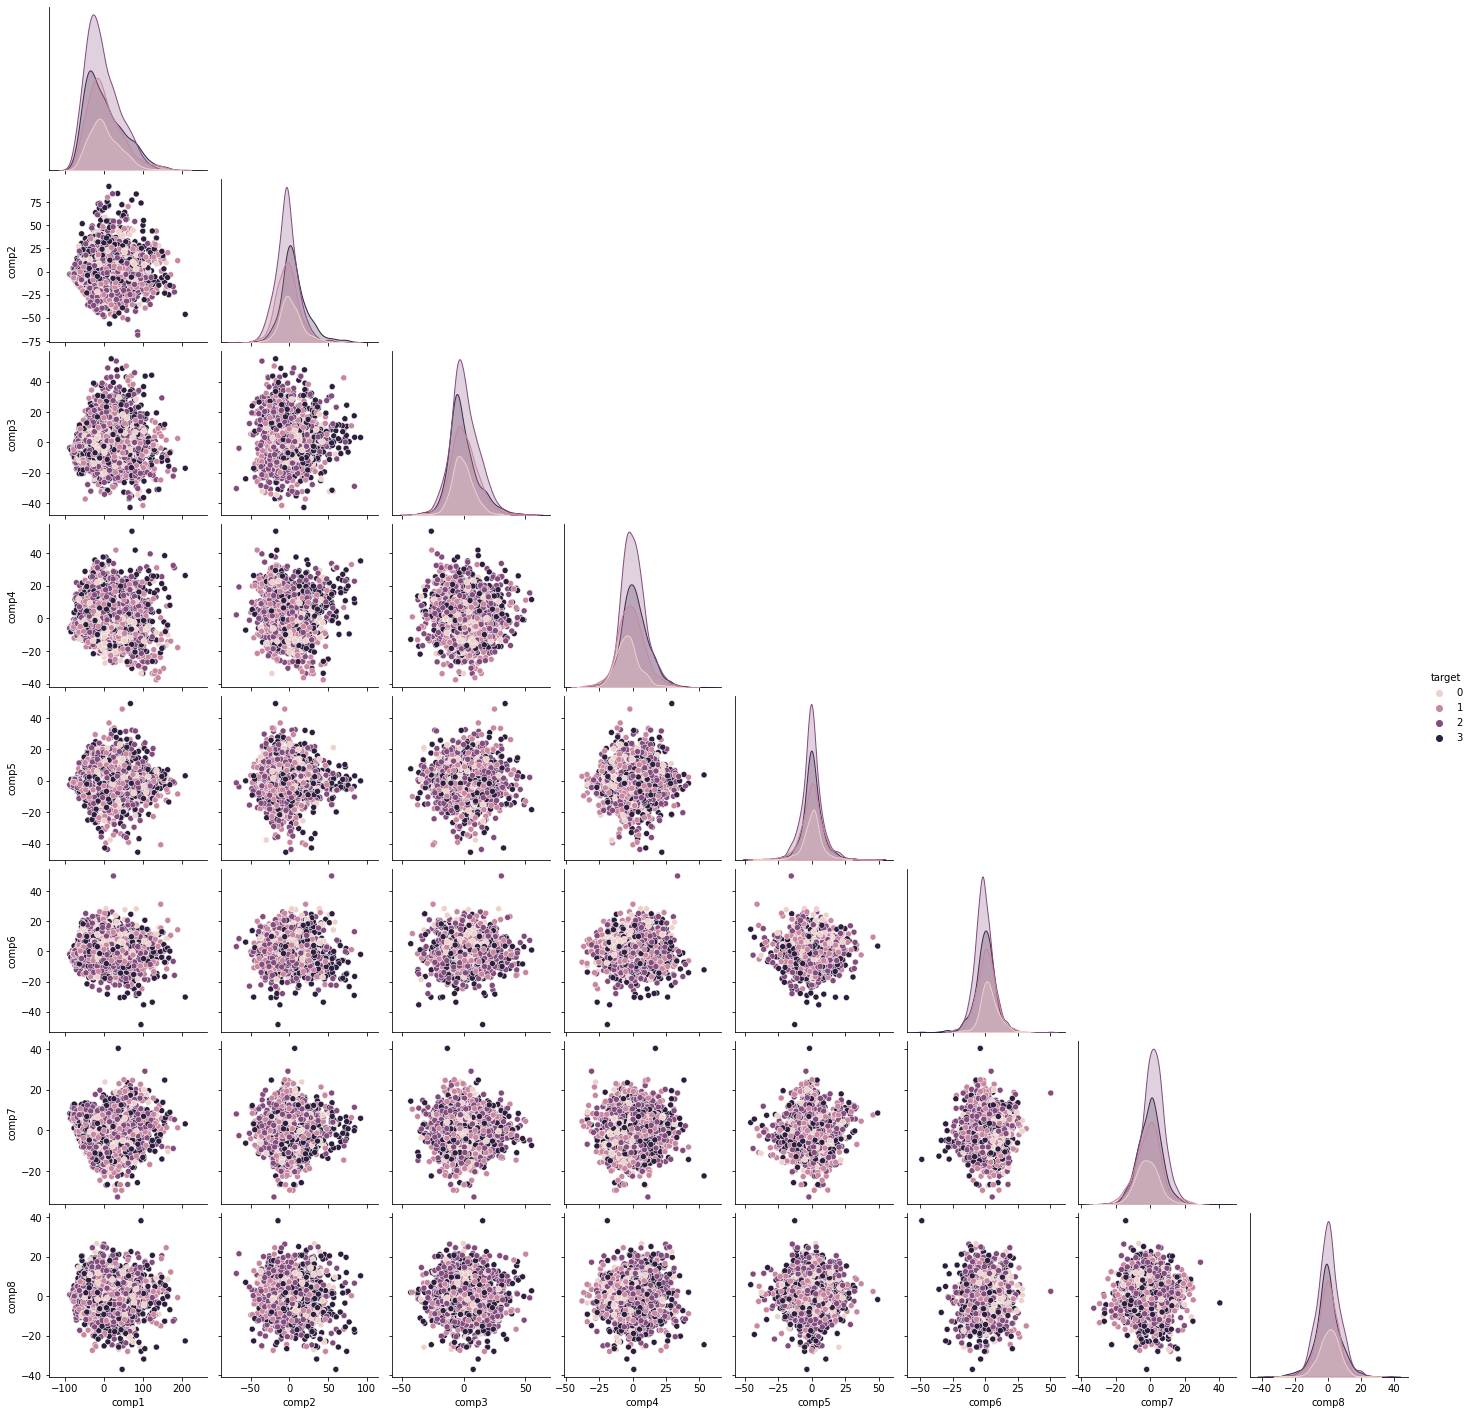

In [8]:
fig = plt.figure(figsize=(21, 21))
sns.pairplot(train_images_decomposed1, hue='target', corner=True)
sns.despine()

Wall time: 9.37 s


<Figure size 1512x1512 with 0 Axes>

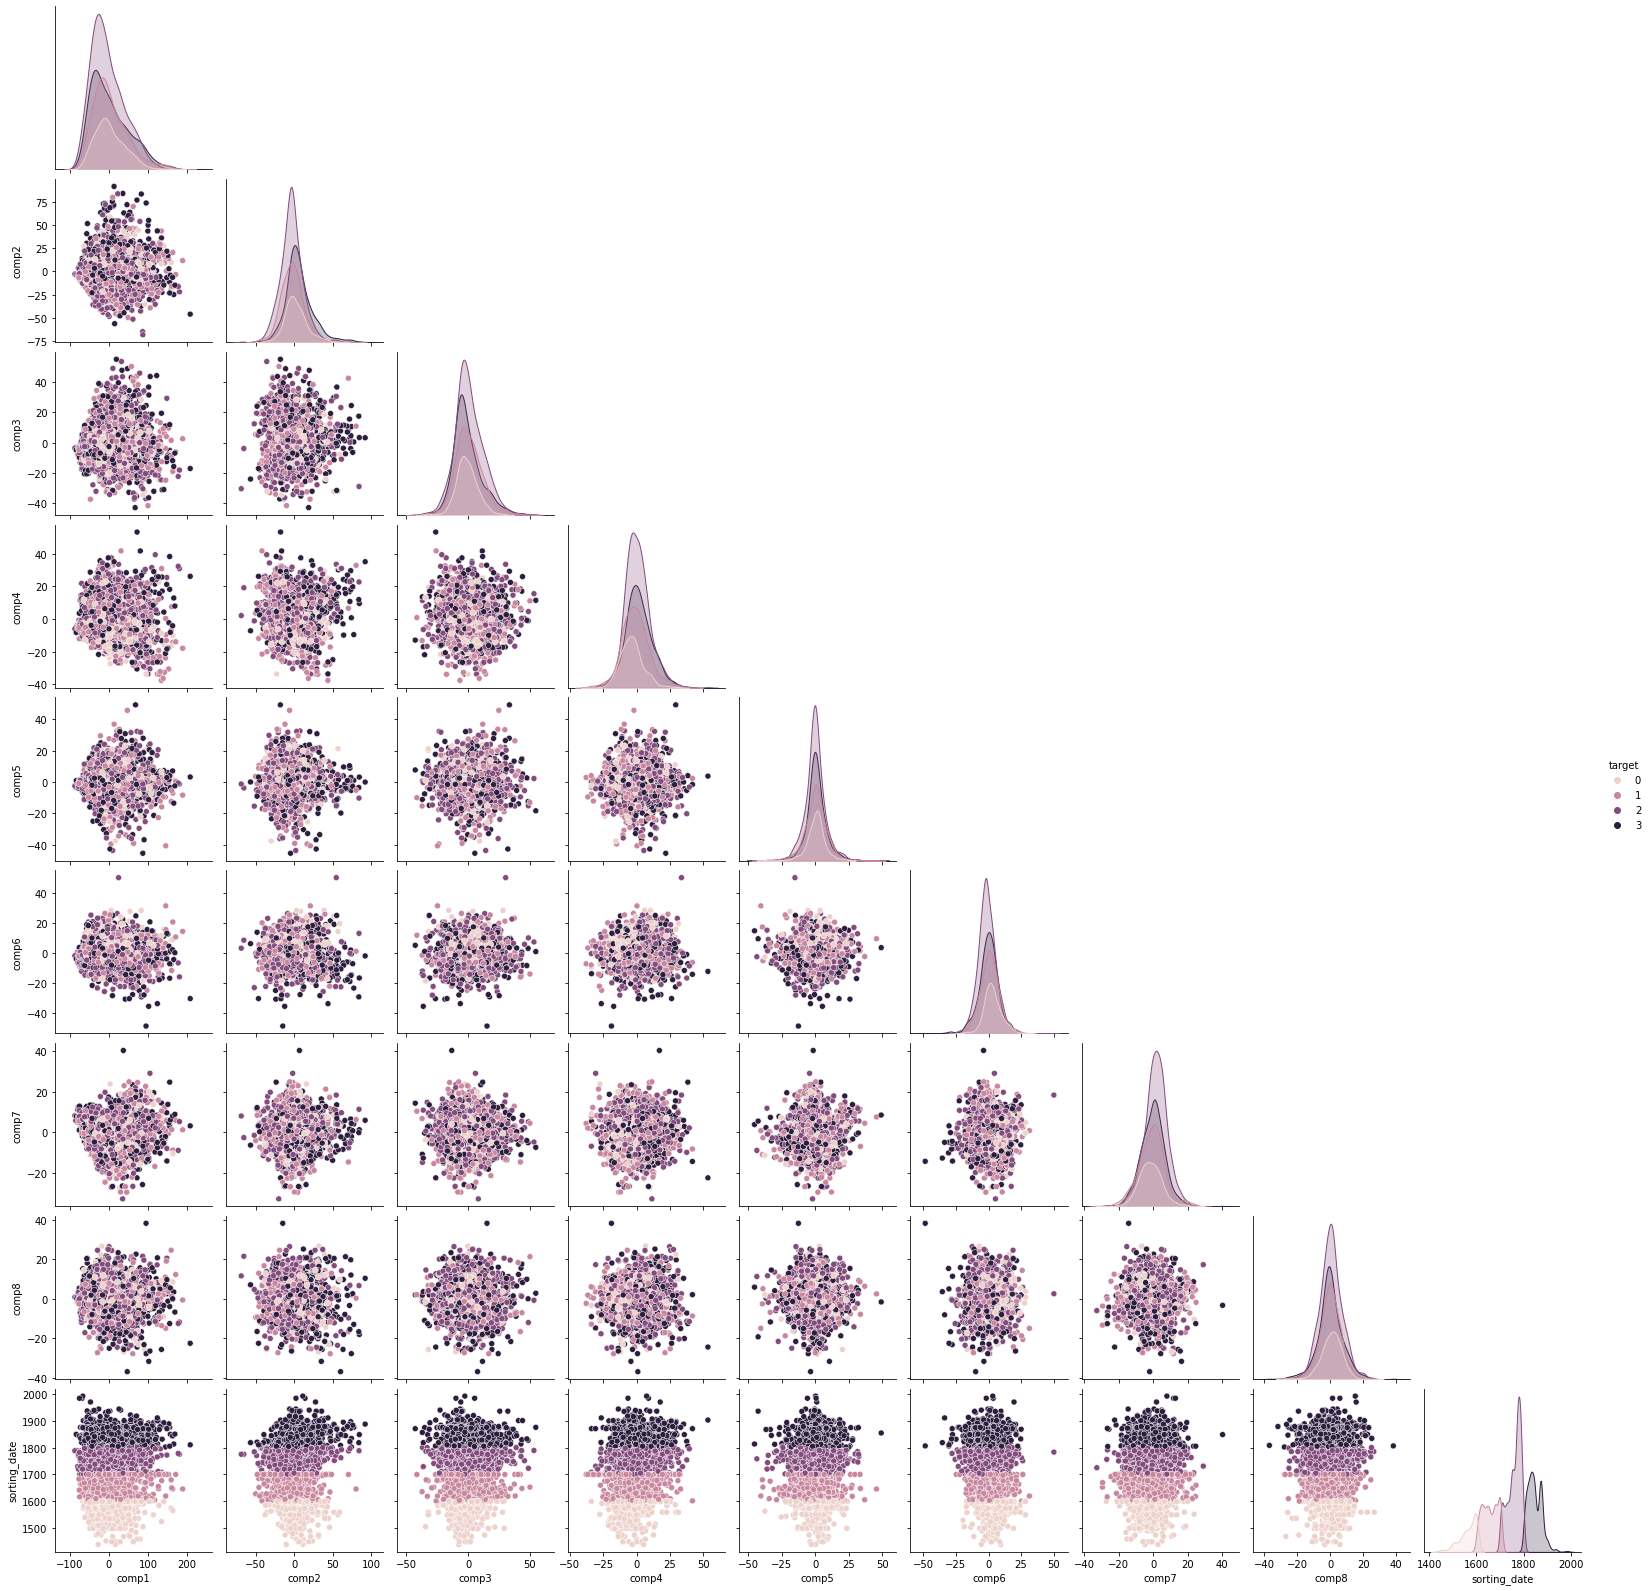

In [23]:
%%time
fig = plt.figure(figsize=(21, 21))
train_images_decomposed1['sorting_date'] = train['sorting_date']
sns.pairplot(train_images_decomposed1, hue='target', corner=True)
sns.despine()

In [9]:
%%time
decomposer2 = KernelPCA(n_components=8, random_state=1, n_jobs=-1, copy_X=True).fit(train_images)
train_images_decomposed2 = decomposer2.transform(train_images)

Wall time: 58.7 s


In [10]:
train_images_decomposed2 = pd.DataFrame(data=train_images_decomposed2,
                                        columns=[f'comp{i + 1}' for i in range(train_images_decomposed2.shape[1])])
train_images_decomposed2['target'] = train['target']

<Figure size 1512x1512 with 0 Axes>

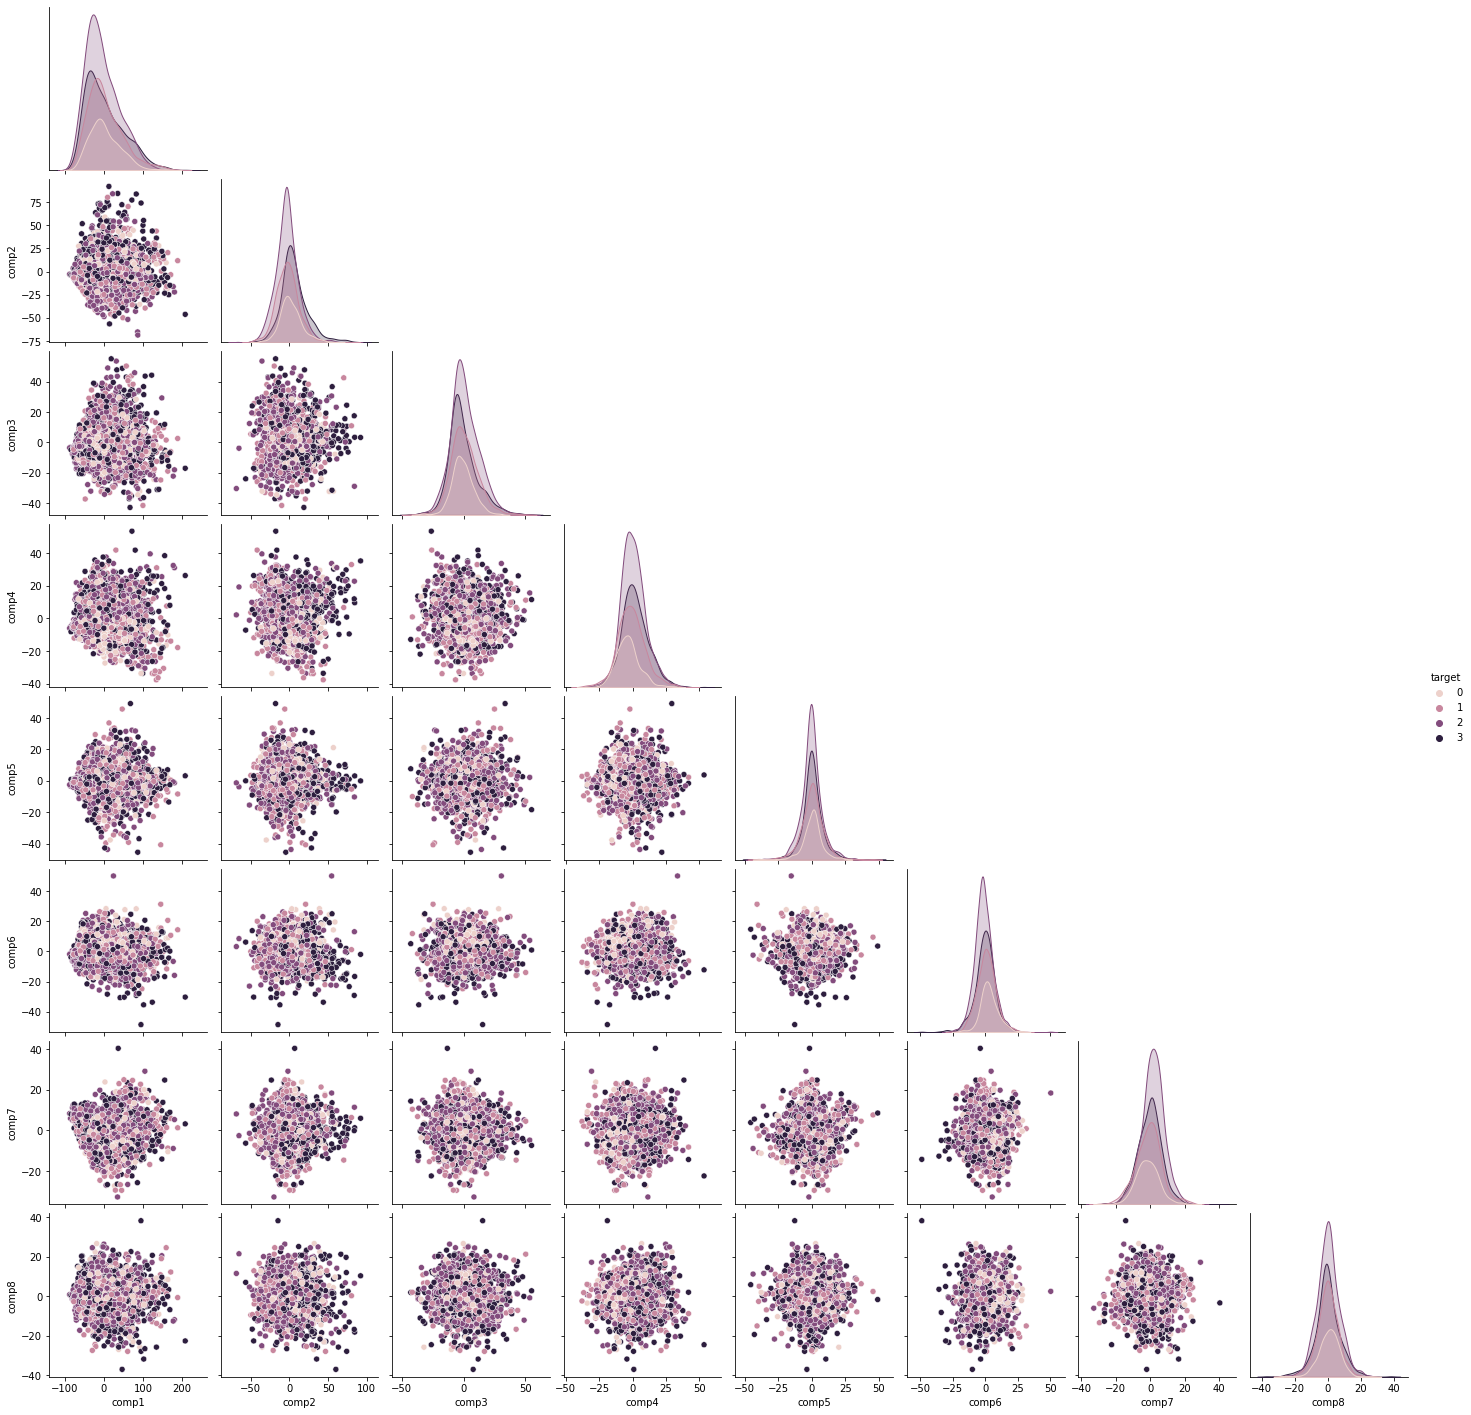

In [11]:
fig = plt.figure(figsize=(21, 21))
sns.pairplot(train_images_decomposed2, hue='target', corner=True)
sns.despine()

Wall time: 9.34 s


<Figure size 1512x1512 with 0 Axes>

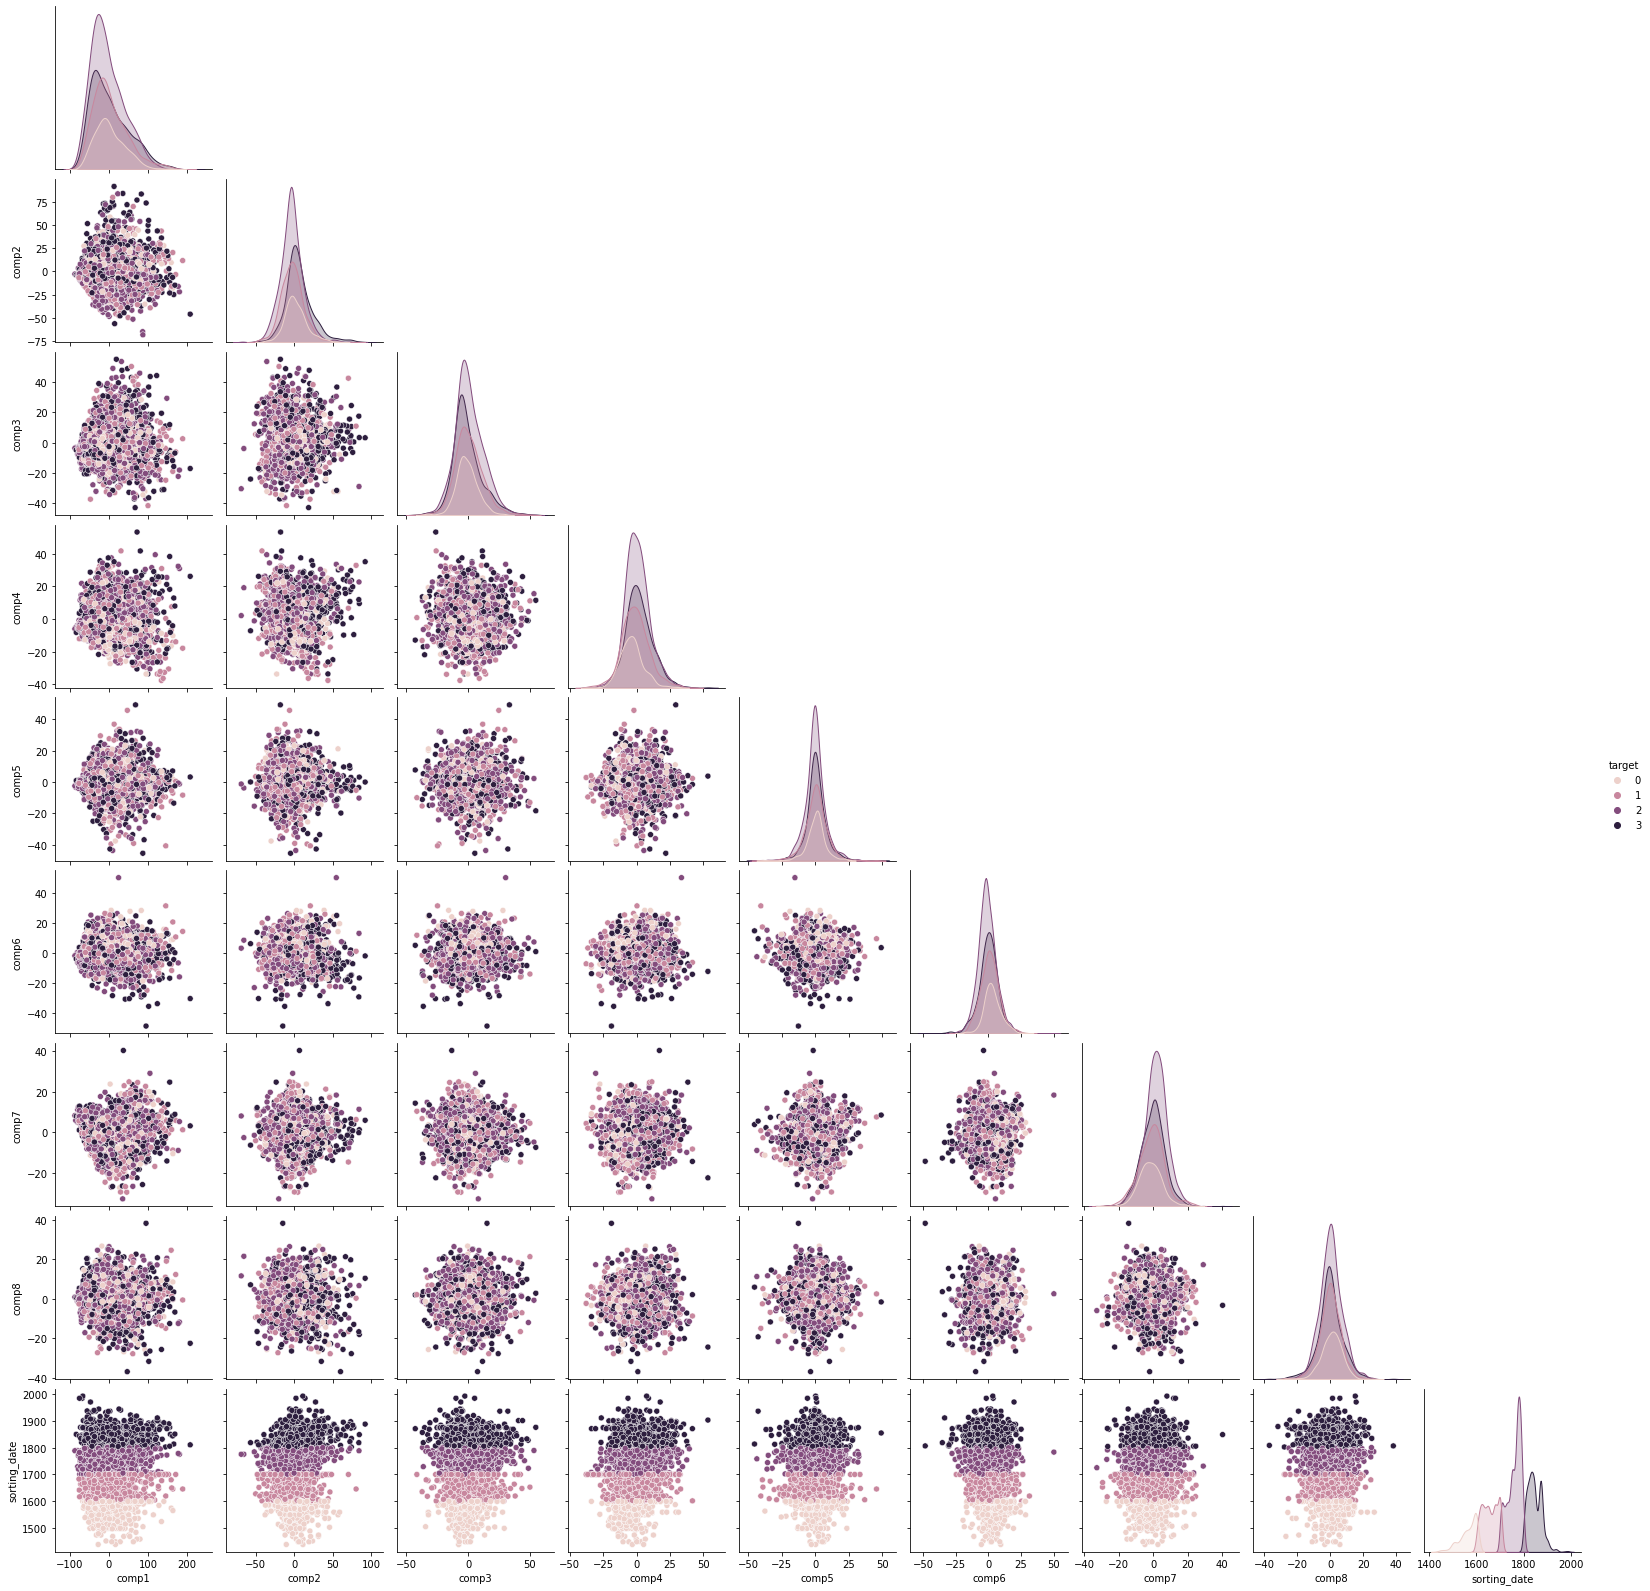

In [24]:
%%time
fig = plt.figure(figsize=(21, 21))
train_images_decomposed2['sorting_date'] = train['sorting_date']
sns.pairplot(train_images_decomposed2, hue='target', corner=True)
sns.despine()

In [12]:
%%time
decomposer3 = NMF(n_components=8, max_iter=1000, shuffle=True).fit(train_images.copy())
train_images_decomposed3 = decomposer3.transform(train_images.copy())

C:\Users\nndropout\miniconda3\envs\img-beginner\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\nndropout\miniconda3\envs\img-beginner\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Wall time: 11min 21s


In [13]:
train_images_decomposed3 = pd.DataFrame(data=train_images_decomposed3,
                                        columns=[f'comp{i + 1}' for i in range(train_images_decomposed3.shape[1])])
train_images_decomposed3['target'] = train['target']

<Figure size 1512x1512 with 0 Axes>

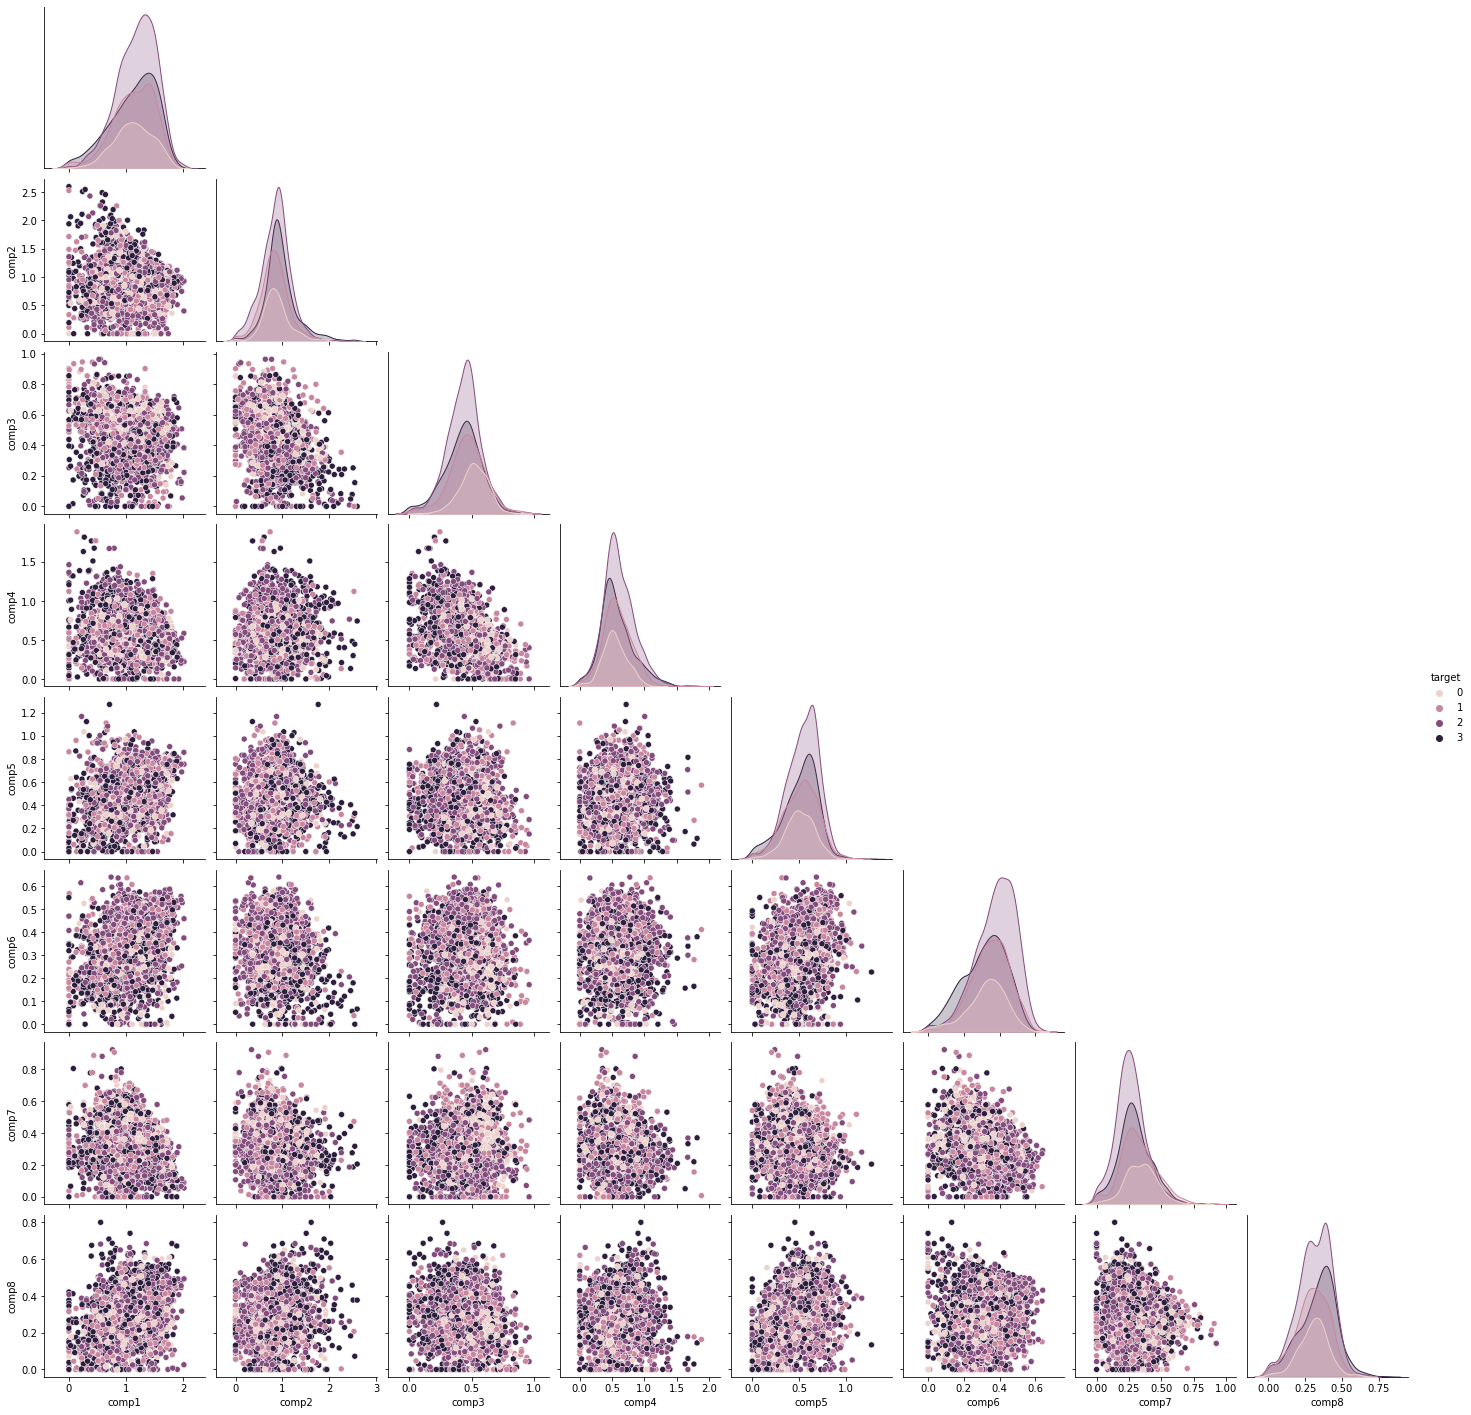

In [14]:
fig = plt.figure(figsize=(21, 21))
sns.pairplot(train_images_decomposed3, hue='target', corner=True)
sns.despine()

Wall time: 9.09 s


<Figure size 1512x1512 with 0 Axes>

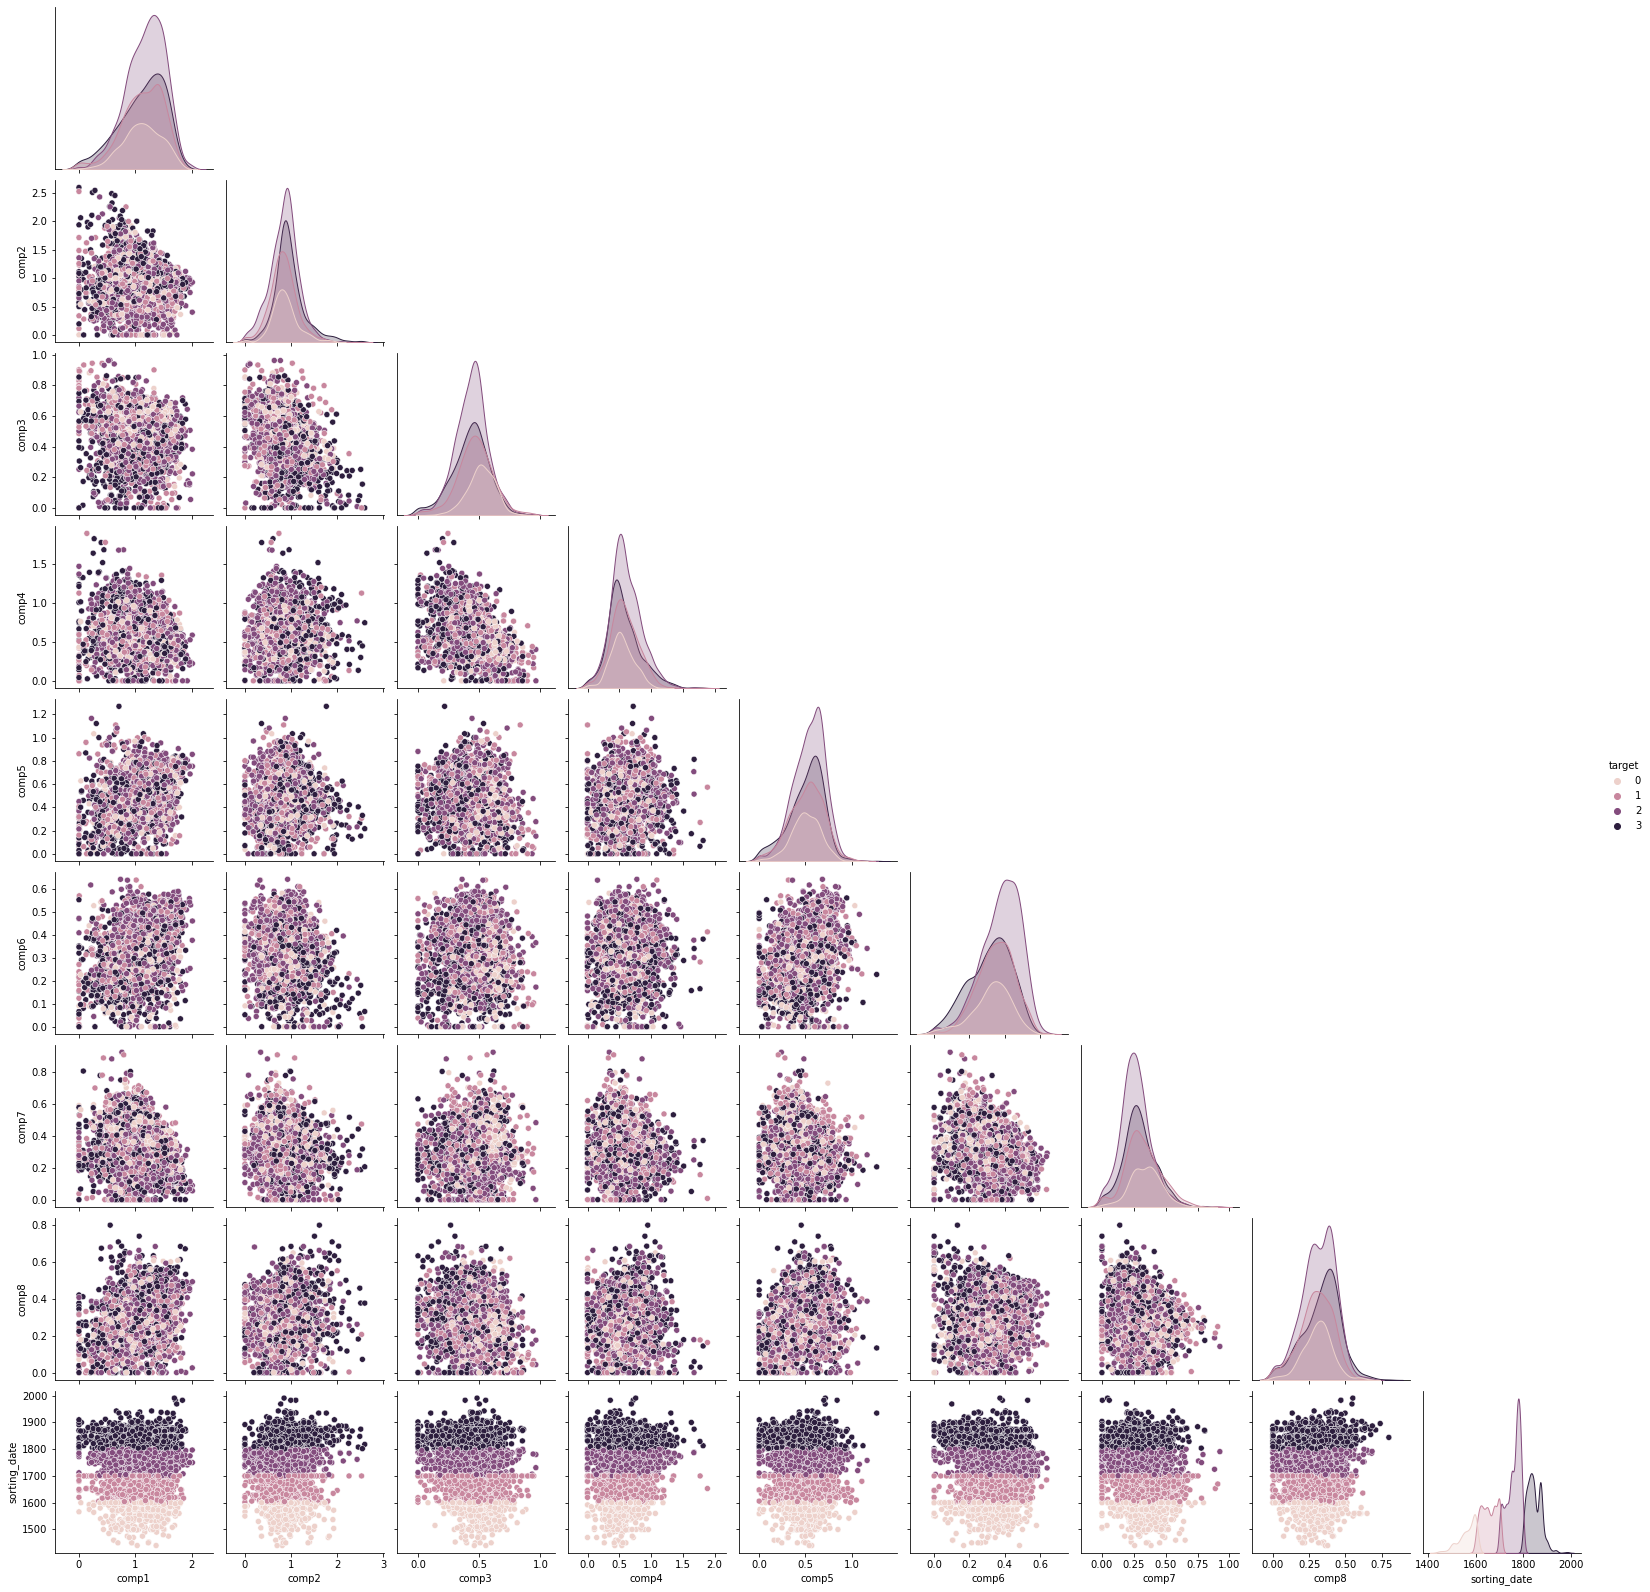

In [25]:
%%time
fig = plt.figure(figsize=(21, 21))
train_images_decomposed3['sorting_date'] = train['sorting_date']
sns.pairplot(train_images_decomposed3, hue='target', corner=True)
sns.despine()

In [17]:
%%time
train_images_decomposed4 = TSNE(n_components=2, n_jobs=-1, random_state=1).fit_transform(train_images.copy())

Wall time: 44.1 s


In [18]:
train_images_decomposed4 = pd.DataFrame(data=train_images_decomposed4,
                                        columns=[f'comp{i + 1}' for i in range(train_images_decomposed4.shape[1])])
train_images_decomposed4['target'] = train['target']

<Figure size 1152x1152 with 0 Axes>

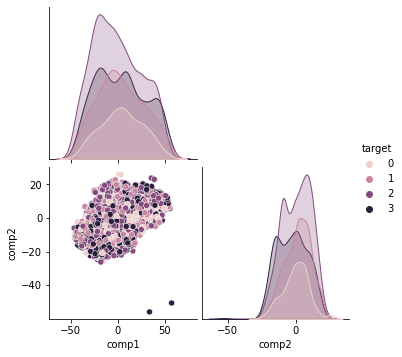

In [19]:
fig = plt.figure(figsize=(16, 16))
sns.pairplot(train_images_decomposed4, hue='target', corner=True)
sns.despine()

Wall time: 1.12 s


<Figure size 1512x1512 with 0 Axes>

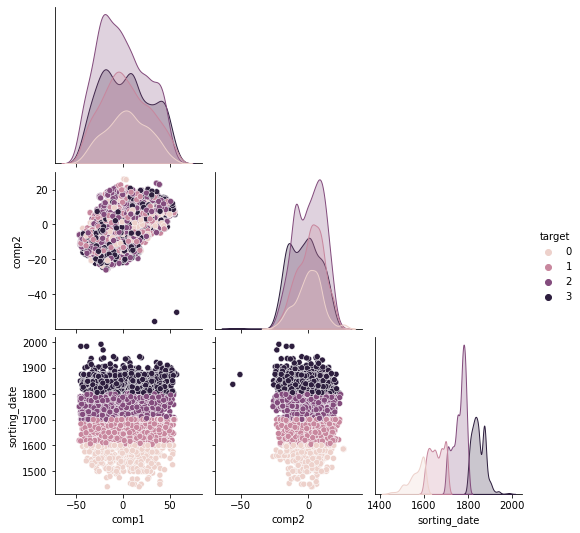

In [26]:
%%time
fig = plt.figure(figsize=(21, 21))
train_images_decomposed4['sorting_date'] = train['sorting_date']
sns.pairplot(train_images_decomposed4, hue='target', corner=True)
sns.despine()

In [22]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
train_pred = []
valid_pred = []
test_pred = []
for train_idx, valid_idx in spitter.split(train_m)